In [ ]:
import numpy as np
import matplotlib.pyplot as plt


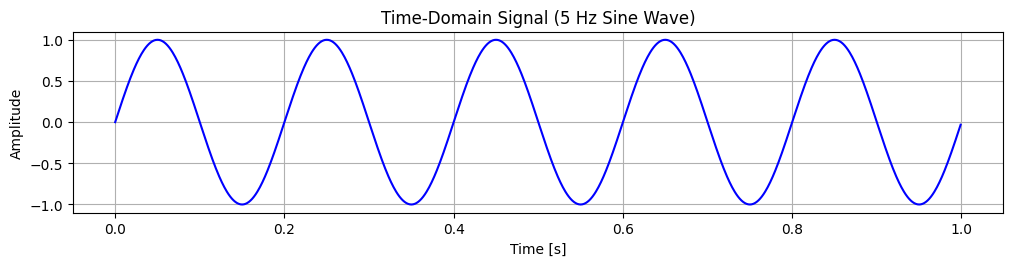

In [ ]:
# (a) Generate sinusoidal signal
fs = 1000          # Sampling frequency (Hz)
f = 5              # Signal frequency (Hz)
duration = 1       # seconds
t = np.arange(0, duration, 1/fs)
x = np.sin(2 * np.pi * f * t)

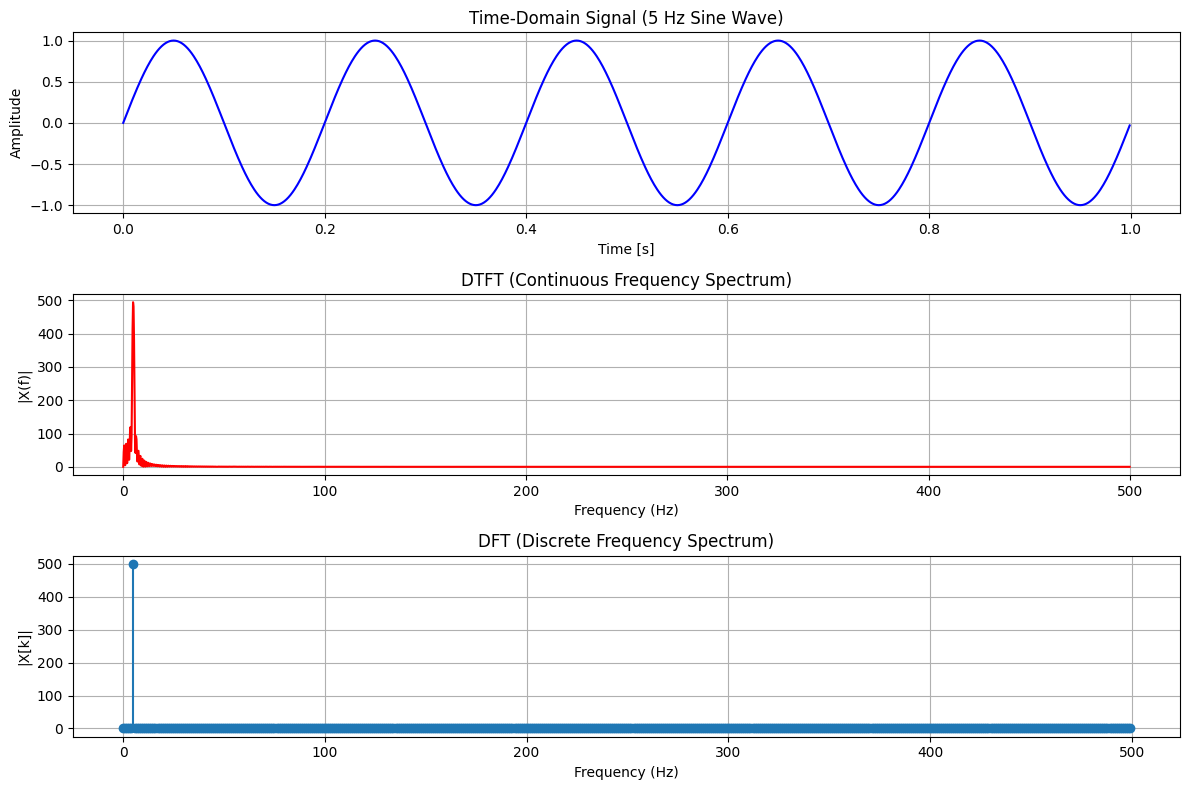

In [ ]:

# (b) Plot time-domain waveform
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t, x, 'b')
plt.title("Time-Domain Signal (5 Hz Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# (c) DTFT approximation using FFT with zero-padding (continuous freq spectrum)
N_fft = 4096  # High number of FFT points for smooth DTFT approx
X_dtft = np.fft.fft(x, N_fft)
freq_dtft = np.fft.fftfreq(N_fft, d=1/fs)

# Only take positive frequencies
pos_mask = freq_dtft >= 0
plt.subplot(3,1,2)
plt.plot(freq_dtft[pos_mask], np.abs(X_dtft[pos_mask]), 'r')
plt.title("DTFT (Continuous Frequency Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X(f)|")
plt.grid(True)
# (d) DFT (discrete spectrum)
N = len(x)  # DFT length = number of samples
X_dft = np.fft.fft(x, N)
freq_dft = np.fft.fftfreq(N, d=1/fs)

# Only positive half
pos_mask_dft = freq_dft >= 0
plt.subplot(3,1,3)
plt.stem(freq_dft[pos_mask_dft], np.abs(X_dft[pos_mask_dft]), basefmt=" ")
plt.title("DFT (Discrete Frequency Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X[k]|")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# (a) Generate composite signal
fs = 1000       # Sampling frequency (Hz)
T = 1           # Duration (s)
t = np.linspace(0, T, fs, endpoint=False)


In [ ]:
# Two sinusoids: 5 Hz (amp=1), 20 Hz (amp=0.5), 50 Hz (amp=0.8)
x1 = 1.0 * np.sin(2 * np.pi * 5 * t)
x2 = 0.5 * np.sin(2 * np.pi * 20 * t)
x3 = 0.8 * np.sin(2 * np.pi * 50 * t)

In [ ]:
# Composite signal
x = x1 + x2 + x3

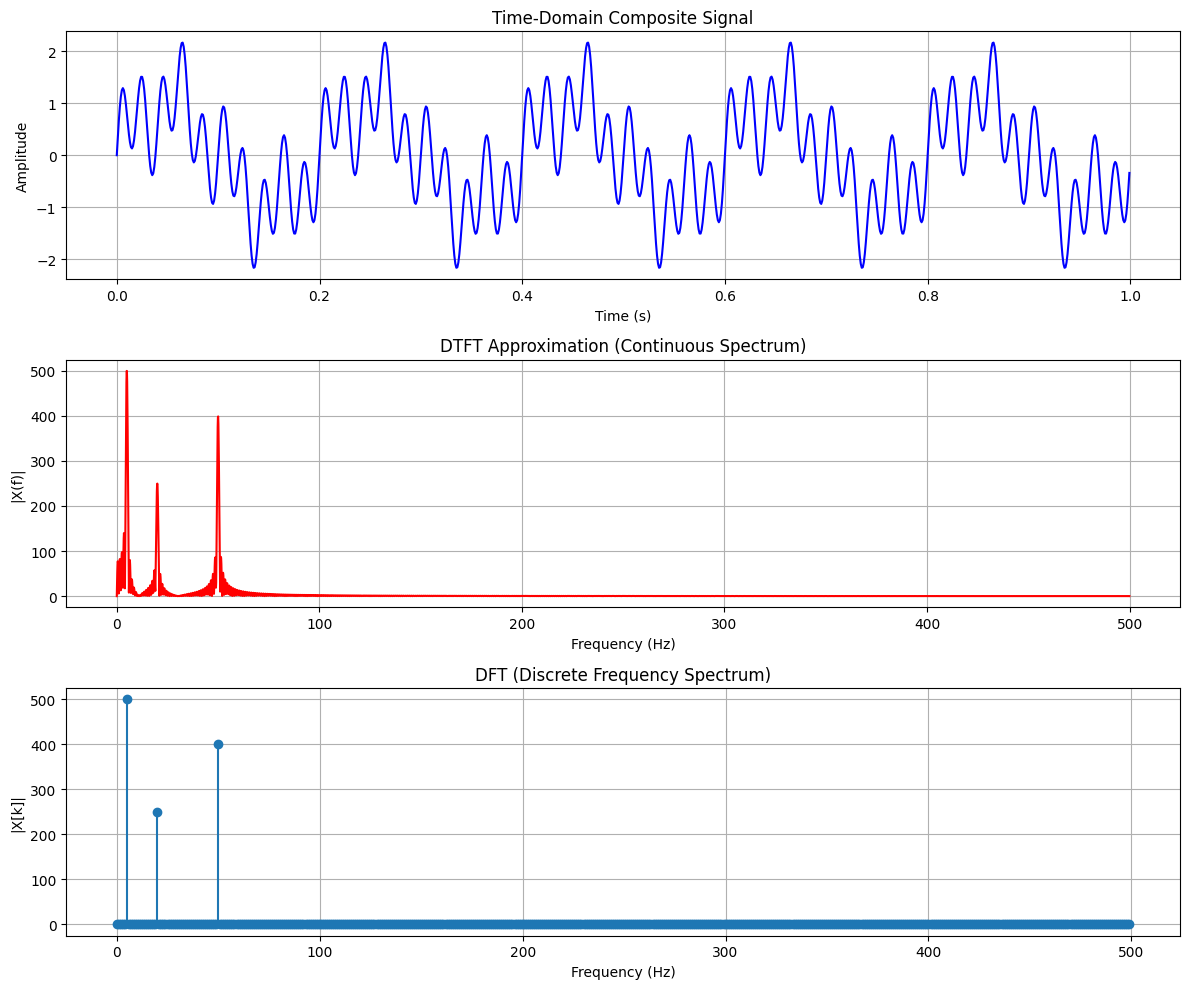

In [ ]:
# (b) Plot time-domain waveform
plt.figure(figsize=(12, 10))
plt.subplot(3,1,1)
plt.plot(t, x, 'b')
plt.title("Time-Domain Composite Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# (c) DTFT approximation (using large FFT with zero padding)
N_fft = 8192
X_dtft = np.fft.fft(x, N_fft)
freq_dtft = np.fft.fftfreq(N_fft, d=1/fs)

# Only positive frequencies
pos_mask = freq_dtft >= 0
plt.subplot(3,1,2)
plt.plot(freq_dtft[pos_mask], np.abs(X_dtft[pos_mask]), 'r')
plt.title("DTFT Approximation (Continuous Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X(f)|")
plt.grid(True)

# (d) DFT (using FFT with signal length)
N = len(x)
X_dft = np.fft.fft(x, N)
freq_dft = np.fft.fftfreq(N, d=1/fs)

pos_mask_dft = freq_dft >= 0
plt.subplot(3,1,3)
plt.stem(freq_dft[pos_mask_dft], np.abs(X_dft[pos_mask_dft]), basefmt=" ")
plt.title("DFT (Discrete Frequency Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X[k]|")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# (a) Generate an exponentially decaying signal
fs = 1000          # Sampling frequency (Hz)
t = np.linspace(0, 2, 2*fs, endpoint=False)  # Time from 0 to 2 sec
a = 5              # Decay rate
x = np.exp(-a * t) # Exponentially decaying signal

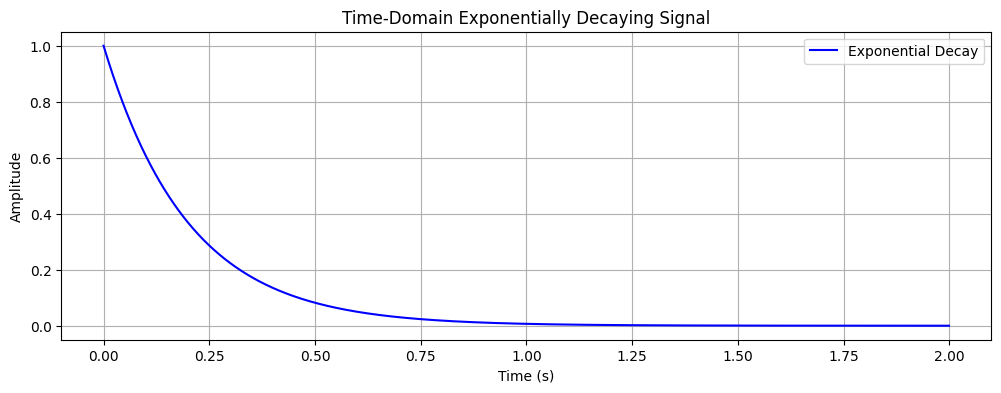

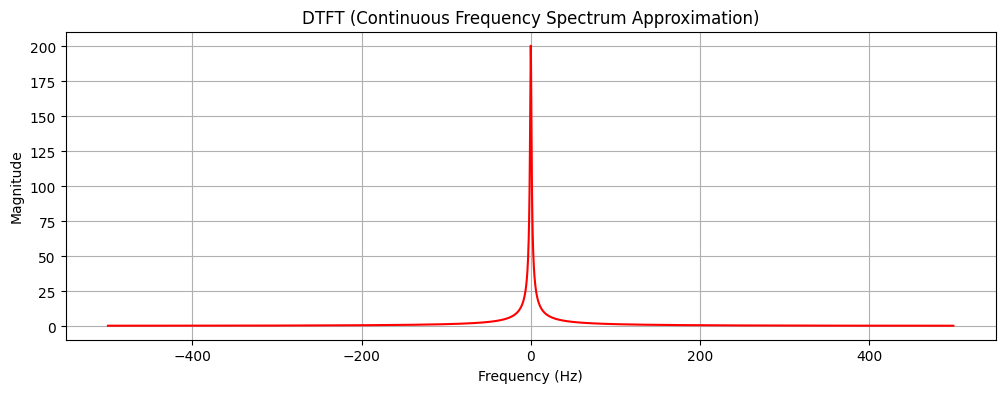

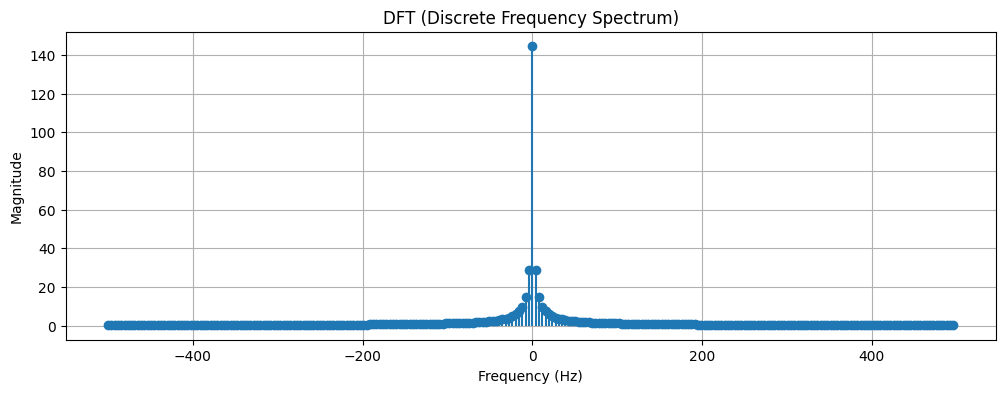

In [ ]:
# (b) Plot the time-domain waveform
plt.figure(figsize=(12,4))
plt.plot(t, x, label="Exponential Decay", color='blue')
plt.title("Time-Domain Exponentially Decaying Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# (c) Compute DTFT (continuous frequency spectrum approximation)
# DTFT is approximated by taking very high-resolution FFT
N_dtft = 4096   # High resolution FFT size
X_dtft = np.fft.fft(x, N_dtft)
freq_dtft = np.fft.fftfreq(N_dtft, 1/fs)

# Shift for proper frequency plotting
X_dtft_shifted = np.fft.fftshift(X_dtft)
freq_dtft_shifted = np.fft.fftshift(freq_dtft)

plt.figure(figsize=(12,4))
plt.plot(freq_dtft_shifted, np.abs(X_dtft_shifted), color='red')
plt.title("DTFT (Continuous Frequency Spectrum Approximation)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# (d) Compute DFT (discrete frequency spectrum)
N_dft = 256   # DFT length
X_dft = np.fft.fft(x[:N_dft], N_dft)
freq_dft = np.fft.fftfreq(N_dft, 1/fs)

plt.figure(figsize=(12,4))
plt.stem(freq_dft, np.abs(X_dft), basefmt=" ")
plt.title("DFT (Discrete Frequency Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [ ]:
# (e) Analysis
print("Analysis:")
print("1. In the time domain, the signal decays exponentially with time.")
print("2. In the frequency domain (DTFT/DFT), the spectrum is spread across many frequencies.")
print("3. A faster decay in time domain corresponds to a wider spread in frequency domain.")
print("   (Time-domain compression <-> Frequency-domain expansion).")
print("4. Unlike a sinusoidal signal which has sharp frequency peaks, the exponential decay shows")
print("   a smooth frequency response, as it is not periodic.")

Analysis:
1. In the time domain, the signal decays exponentially with time.
2. In the frequency domain (DTFT/DFT), the spectrum is spread across many frequencies.
3. A faster decay in time domain corresponds to a wider spread in frequency domain.
   (Time-domain compression <-> Frequency-domain expansion).
4. Unlike a sinusoidal signal which has sharp frequency peaks, the exponential decay shows
   a smooth frequency response, as it is not periodic.


In [ ]:
# (a) Generate a rectangular pulse signal
fs = 1000           # Sampling frequency (Hz)
T = 1               # Total duration (s)
t = np.linspace(0, T, fs, endpoint=False)

# Rectangular pulse parameters
pulse_start = 0.3   # seconds
pulse_end = 0.7     # seconds

x = np.where((t >= pulse_start) & (t <= pulse_end), 1, 0)  # Rectangular pulse

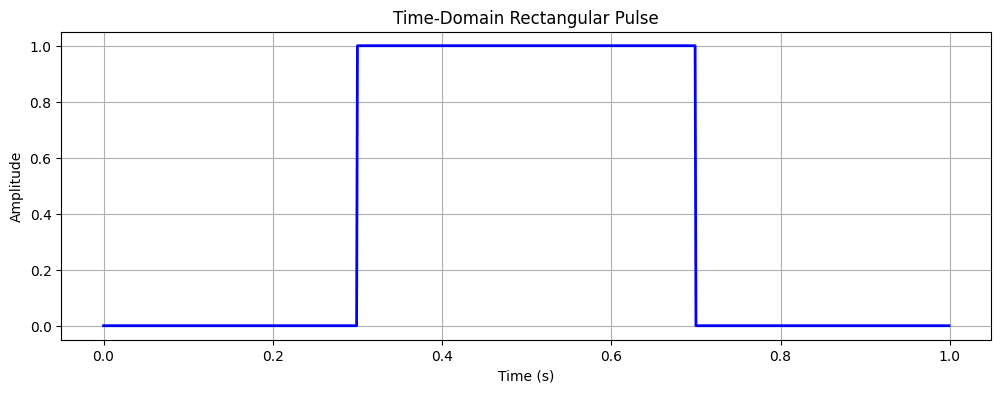

In [ ]:
# (b) Plot time-domain waveform
plt.figure(figsize=(12, 4))
plt.plot(t, x, 'b', linewidth=2)
plt.title("Time-Domain Rectangular Pulse")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [ ]:
# (c) DTFT approximation using zero-padded FFT
N_fft = 4096
X_dtft = np.fft.fft(x, N_fft)
freq_dtft = np.fft.fftfreq(N_fft, d=1/fs)

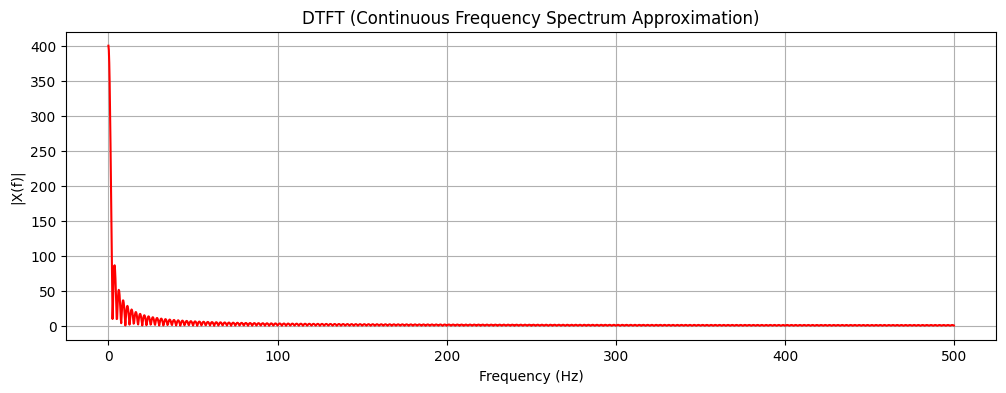

In [ ]:
# Only positive frequencies
pos_mask = freq_dtft >= 0
plt.figure(figsize=(12, 4))
plt.plot(freq_dtft[pos_mask], np.abs(X_dtft[pos_mask]), 'r')
plt.title("DTFT (Continuous Frequency Spectrum Approximation)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X(f)|")
plt.grid(True)
plt.show()

In [ ]:
# (d) DFT (discrete frequency spectrum)
N_dft = len(x)
X_dft = np.fft.fft(x, N_dft)
freq_dft = np.fft.fftfreq(N_dft, d=1/fs)

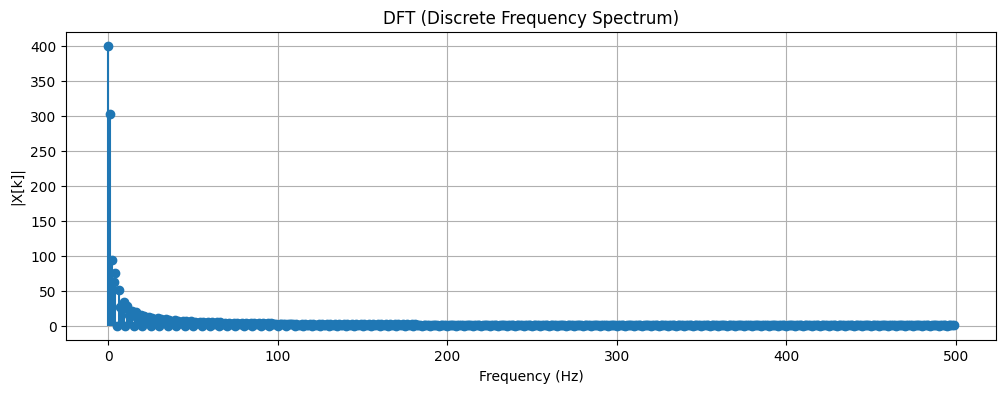

In [ ]:
# Only positive frequencies
pos_mask_dft = freq_dft >= 0
plt.figure(figsize=(12, 4))
plt.stem(freq_dft[pos_mask_dft], np.abs(X_dft[pos_mask_dft]), basefmt=" ")
plt.title("DFT (Discrete Frequency Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

The analysis of the rectangular pulse signal illustrates the key characteristics of a finite-duration signal in both time and frequency domains. In the time domain, the signal maintains a constant amplitude within its defined width and is zero elsewhere, forming a clearly bounded rectangular shape. The DTFT, approximated using a high-resolution FFT, shows a sinc-shaped continuous frequency spectrum, demonstrating that a signal with finite duration in time corresponds to a spread of energy across multiple frequencies. The DFT, computed for a finite number of samples, presents discrete frequency bins that capture the same spectral content but at discrete intervals, confirming the correspondence between continuous and discrete frequency representations.